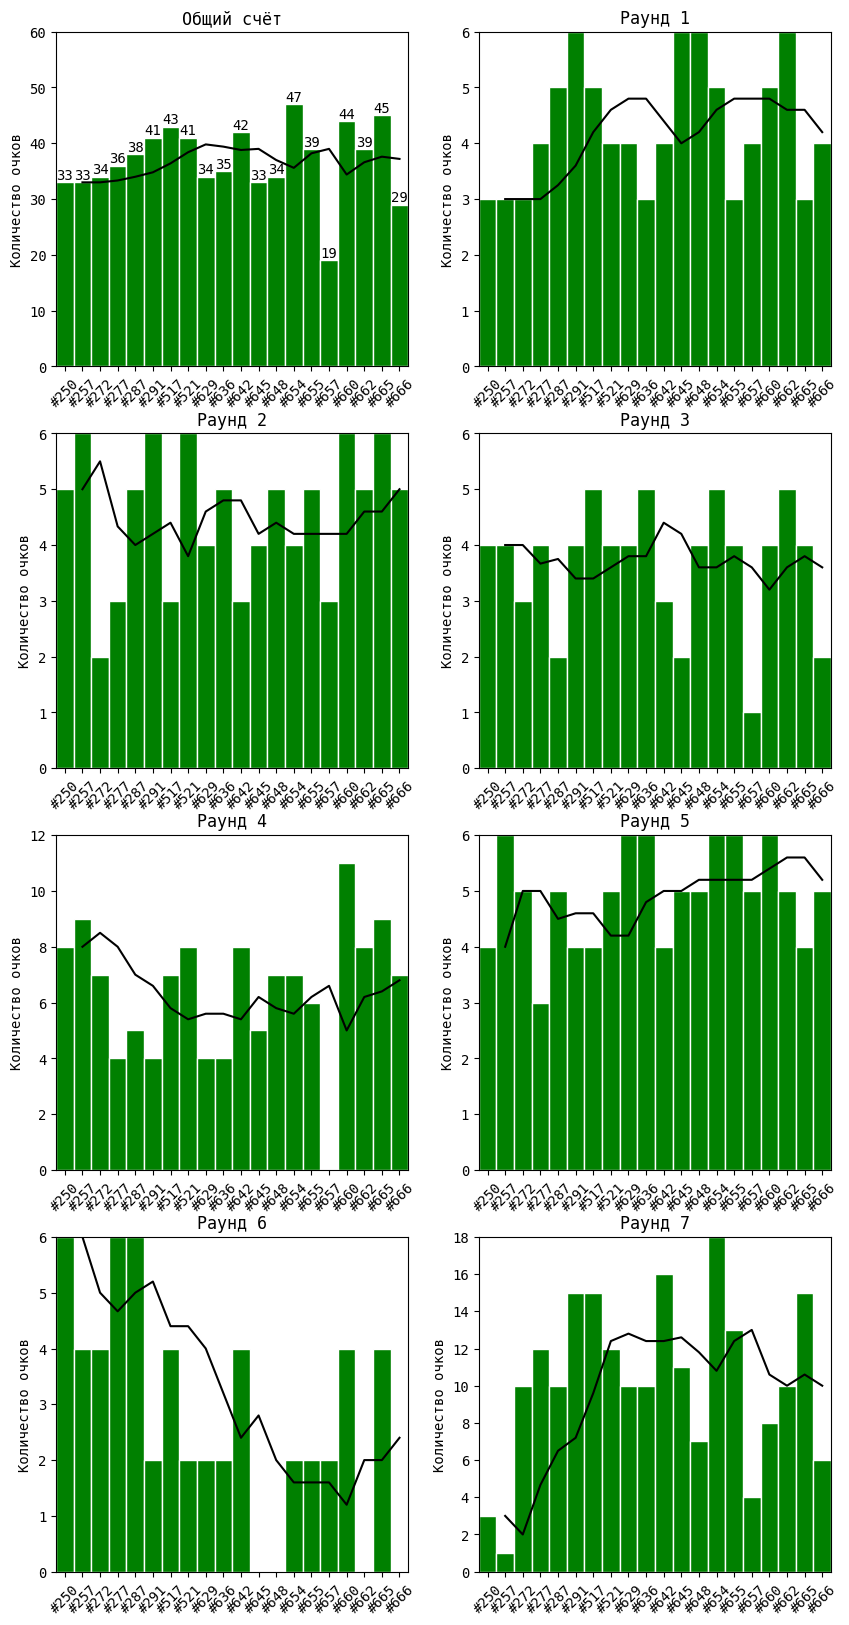

In [13]:

import sys

sys.path.append('../')

from matplotlib.axes import Axes
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from src.gamedb import offline_games_df as offline_df
import matplotlib
import pandas as pd

fig: Figure
axs: list[Axes]
fig, axs = plt.subplots(4,2,figsize=(10, 20))

matplotlib.rcParams['font.family'] = 'monospace'

team_name = 'Давайте ещё немного подумаем'

max_round_scores = [60,6,6,6,12,6,6,18]

team_data:pd.DataFrame= offline_df.loc[offline_df['team_name'] == team_name]
moving_team_average = team_data.shift(1).loc[:,'round_1':'final_score'][1:].rolling(5,min_periods=1).mean()

ax:Axes
for round_number, ax in enumerate(axs.flat):
    is_total_score = (round_number == 0)
    round_name = f"round_{round_number}" if not is_total_score else 'final_score'

    ax.set_title(f"Раунд {round_number}")

    labels = []

    for idx, (ituple, row) in enumerate(team_data.iterrows()):
        team_score = row.loc[round_name]
        bar = ax.bar(idx, team_score, width=1.0, edgecolor='w', linewidth=1, color='green')
        game_id = ituple[0]
        place = ituple[1]
        team_count = len(offline_df.loc[(game_id,),:])

        date = row.loc['date']
        location = row.loc['location']
        question_set = row.loc['question_set']

        labels.append(f"#{question_set}")
        # if round_number % 2 == 0:
        #     # place = f"({item[0]})"
        #     place_string = f"{place} место"
        #     teams_string = f"{team_count} команд"
        #     # labels.append(f"№{game_id} #{question_set}    {location:<20}    {date:<30}    {teams_string:<10}    {place_string:>9}")
        #     labels.append(f"{location} #{question_set}")
        # else:
        #     labels.append(place)
        
        if is_total_score:
            ax.bar_label(bar)
            ax.set_title("Общий счёт")

    ax.plot(list(range(1, len(team_data))), moving_team_average[round_name], color='black')

    ax.set_ylim(ymin=min(0, team_data[round_name].min()), ymax=max_round_scores[round_number])
    
    ax.set_ylabel('Количество очков')
    ax.margins(x=0, y=1)
    # ax.invert_yaxis()

    ax.set_xticks(list(range(0, len(team_data))), rotation=45, labels=labels)

    
   

# polarplot(theta,rho)

plt.show()
